In [1]:
import pandas_datareader as pdr

In [6]:
key = '775ec315301f84e54aeecbebcc113eb70309ff4b'

In [7]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [8]:
df.to_csv('AAPL.csv')

In [9]:
import pandas as pd

In [27]:
df = pd.read_csv('AAPL.csv')

In [28]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-03-03 00:00:00+00:00,166.23,168.91,165.55,168.470,76678441,166.23,168.91,165.55,168.470,76678441,0.0,1.0
1254,AAPL,2022-03-04 00:00:00+00:00,163.17,165.55,162.10,164.490,83819592,163.17,165.55,162.10,164.490,83819592,0.0,1.0
1255,AAPL,2022-03-07 00:00:00+00:00,159.30,165.02,159.04,163.360,96418845,159.30,165.02,159.04,163.360,96418845,0.0,1.0
1256,AAPL,2022-03-08 00:00:00+00:00,157.44,162.88,155.80,158.820,131148280,157.44,162.88,155.80,158.820,131148280,0.0,1.0
1257,AAPL,2022-03-09 00:00:00+00:00,162.95,163.41,159.41,161.475,91454905,162.95,163.41,159.41,161.475,91454905,0.0,1.0


In [29]:
df_close = df['close']

In [30]:
df_close.head()

0    139.20
1    138.99
2    140.46
3    140.69
4    139.99
Name: close, dtype: float64

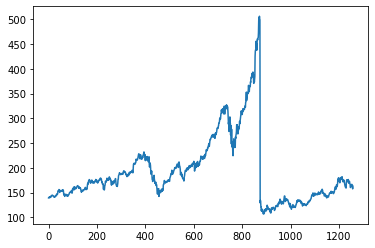

In [31]:
import matplotlib.pyplot as plt
plt.plot(df_close)

LSTM are case sensitive to scale of data

In [32]:
import numpy as np

In [33]:
type(df_close)

pandas.core.series.Series

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
df_close = scale.fit_transform(np.array(df_close).reshape(-1,1))

In [35]:
type(df_close)

numpy.ndarray

splitting train and test set sequentialy first train data then test data

In [36]:
train_size = int(len(df_close)*0.65)
train = df_close[:train_size,:]
test = df_close[train_size: ,:]

In [39]:
test

array([[6.16155291e-01],
       [5.73725736e-01],
       [5.80989355e-01],
       [5.91484033e-01],
       [6.14251722e-01],
       [6.13024421e-01],
       [6.13375078e-01],
       [6.08340639e-01],
       [6.31258610e-01],
       [6.50444584e-01],
       [6.34239198e-01],
       [6.46211647e-01],
       [6.18134001e-01],
       [6.38547276e-01],
       [6.46111459e-01],
       [6.44383219e-01],
       [6.44383219e-01],
       [6.68778961e-01],
       [6.65873513e-01],
       [6.87614277e-01],
       [6.91721979e-01],
       [6.93400125e-01],
       [6.88966813e-01],
       [7.04796493e-01],
       [7.11484033e-01],
       [6.99436443e-01],
       [6.97482780e-01],
       [7.17820914e-01],
       [7.04220413e-01],
       [7.06950532e-01],
       [6.62592361e-01],
       [6.60288040e-01],
       [6.82279274e-01],
       [6.66675016e-01],
       [6.84583594e-01],
       [6.96105197e-01],
       [7.96994364e-01],
       [8.23819662e-01],
       [8.31108328e-01],
       [8.35090795e-01],


Convert an array of data into a dataset matrix

In [41]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        #appending timestamp size data each time 
        dataX.append(dataset[i:(i+time_step),0])
        # appending next 1 data 
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

reshape data into   X = t, t+1, t+2, t+3 ......   Y = t+4 ....

In [42]:
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [43]:
X_train

array([[0.08105197, 0.08052599, 0.08420789, ..., 0.10492173, 0.10822793,
        0.12598622],
       [0.08052599, 0.08420789, 0.08478397, ..., 0.10822793, 0.12598622,
        0.12205385],
       [0.08420789, 0.08478397, 0.08303068, ..., 0.12598622, 0.12205385,
        0.1241077 ],
       ...,
       [0.50968065, 0.52628679, 0.51556669, ..., 0.53853475, 0.54226675,
        0.54672511],
       [0.52628679, 0.51556669, 0.51221039, ..., 0.54226675, 0.54672511,
        0.53971196],
       [0.51556669, 0.51221039, 0.52197871, ..., 0.54672511, 0.53971196,
        0.56270507]])

In [44]:
X_train.shape, X_test.shape

((716, 100), (340, 100))

reshape input to be [sample, time steps, features] which is required for LSTM

In [45]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Create Stacked LSTM model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/50
716/716 [==============================] - 5s 7ms/sample - loss: 0.0233 - val_loss: 0.0012
Epoch 2/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0058 - val_loss: 0.0070
Epoch 3/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0026 - val_loss: 0.0011
Epoch 4/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0016 - val_loss: 3.5004e-04
Epoch 5/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0012 - val_loss: 3.3043e-04
Epoch 6/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0011 - val_loss: 4.1062e-04
Epoch 7/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0012 - val_loss: 3.5670e-04
Epoch 8/50
716/716 [==============================] - 2s 3ms/sample - loss: 0.0010 - val_loss: 2.9571e-04
Epoch 9/50
716/716 [==============================] - 2s 3ms/sample - loss: 9.5344e-04 - val_loss: 2.9734e-04
Epoch 10

In [50]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [52]:
##Transformback to original form
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

In [53]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

218.23105207242233

In [55]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

146.5739439273015

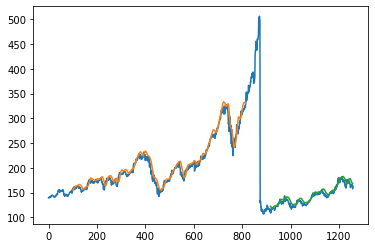

In [57]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scale.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [61]:
x_input=test[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1501033]
101
1 day input [0.09946149 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631
 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781 0.10815279
 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292
 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465
 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078
 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216
 0.17092048 0.16961803 0.181866   0.17257358 0.16904195 0.18149029
 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611
 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802
 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048
 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391 0.14444584
 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599 0.15902317
 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284 0.16235441
 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136 0.16518472
 0.16458359 0.15539136 0.15143394 

8 day output [[0.15605235]]
9 day input [0.11453976 0.10760175 0.10549781 0.10815279 0.11183469 0.1105072
 0.1113087  0.10920476 0.1101315  0.10289292 0.10276769 0.10807765
 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724 0.13570445
 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726
 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327
 0.17282405 0.16546024 0.16418284 0.16235441 0.1702943  0.17392611
 0.16350657 0.15479023 0.15539136 0.16518472 0.16458359 0.15539136
 0.15143394 0.14396994 0.13332498 0.14001252 0.14529743 0.1459737
 0.14116468 0.14958046 0.

16 day output [[0.17220652]]
17 day input [0.1101315  0.10289292 0.10276769 0.10807765 0.10810269 0.11060739
 0.11684408 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877
 0.12515967 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583
 0.14647464 0.16115216 0.17092048 0.16961803 0.181866   0.17257358
 0.16904195 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566
 0.17232311 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513
 0.17715717 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181
 0.1636819  0.17092048 0.17204759 0.1636819  0.16588604 0.15769568
 0.14875391 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732
 0.13119599 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024
 0.16418284 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023
 0.15539136 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994
 0.13332498 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046
 0.14875391 0.14108954 0.13139637 0.12673763 0.14053851 0.1501033
 0.14917861 0.14885409 

24 day output [[0.18923855]]
25 day input [0.13452724 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078
 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216
 0.17092048 0.16961803 0.181866   0.17257358 0.16904195 0.18149029
 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611
 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802
 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048
 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391 0.14444584
 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599 0.15902317
 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284 0.16235441
 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136 0.16518472
 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498 0.14001252
 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391 0.14108954
 0.13139637 0.12673763 0.14053851 0.1501033  0.14917861 0.14885409
 0.14911883 0.14989251 0.15106939 0.1525448  0.15422906 0.15605235
 0.15796474 0.159932

In [64]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [65]:
import matplotlib.pyplot as plt

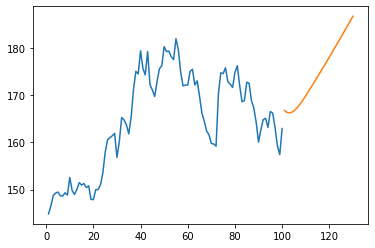

In [66]:
plt.plot(day_new,scale.inverse_transform(df_close[1158:]))
plt.plot(day_pred,scale.inverse_transform(lst_output))

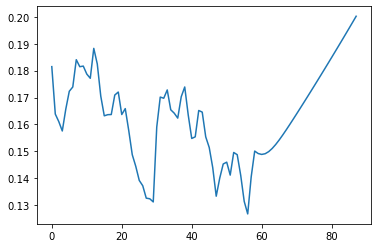

In [67]:
dfx=df_close.tolist()
dfx.extend(lst_output)
plt.plot(dfx[1200:])